# **Análisis y Predicción de Patrones de Consumo Energético con Machine Learning**
----
#### By CilantroMachines

## *Importación de todas las librerías necesarias*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
import sklearn
import folium

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR


## *Creación del dataframe*

Conversión a .csv

In [2]:
# Carga el archivo XLSX
xlsx_file = "Datos.xlsx"
csv_file = "archivo.csv"

# Convierte y guarda como CSV
df = pd.read_excel(xlsx_file)
df.to_csv(csv_file, index=False)
print("Archivo xlsx, cargado.")

print(df.head())
print(df.info())

Archivo xlsx, cargado.
   ID DEPATAMENTO DEPARTAMENTO  ID MUNICIPIO         MUNICIPIO  ID LOCALIDAD  \
0              91     AMAZONAS         91001           LETICIA      91001000   
1              91     AMAZONAS         91540     PUERTO NARIÑO      91540000   
2              91     AMAZONAS         91798    TARAPACÁ (ANM)      91798000   
3               5    ANTIOQUIA          5873  VIGÍA DEL FUERTE       5873001   
4               5    ANTIOQUIA          5873  VIGÍA DEL FUERTE       5873002   

                                           LOCALIDAD  AÑO SERVICIO  \
0                       LETICIA (LETICIA - AMAZONAS)          2020   
1           PUERTO NARIÑO (PUERTO NARIÑO - AMAZONAS)          2020   
2               TARAPACÁ (TARAPACÁ (ANM) - AMAZONAS)          2020   
3  SAN ANTONIO DE PADUA (VIGÍA DEL FUERTE - ANTIO...          2020   
4              VEGÁEZ (VIGÍA DEL FUERTE - ANTIOQUIA)          2020   

   MES SERVICIO  ENERGÍA ACTIVA  ENERGÍA REACTIVA  POTENCIA MÁXIMA  \
0    

## *Analisis Exploratorio de Datos ***(EDA)***:*
-----

### *Preparación de los datos*

Limpieza de datos, eliminación de valores nulos.

In [3]:
# Identificar valores nulos
print(df.isnull().sum())

# Opcional: Llenar valores nulos con un método específico
df.fillna(0, inplace=True)  # Ejemplo

ID DEPATAMENTO              0
DEPARTAMENTO                0
ID MUNICIPIO                0
MUNICIPIO                   0
ID LOCALIDAD                0
LOCALIDAD                   0
AÑO SERVICIO                0
MES SERVICIO                0
ENERGÍA ACTIVA              0
ENERGÍA REACTIVA            0
POTENCIA MÁXIMA             0
DÍA DE DEMANDA MÁXIMA       0
FECHA DE DEMANDA MÁXIMA     0
PROMEDIO DIARIO EN HORAS    0
dtype: int64


Se convierten los datos, como fechas a formato datetime.

In [4]:
# Convertir columna de fechas a tipo datetime
df['FECHA DE DEMANDA MÁXIMA'] = pd.to_datetime(df['FECHA DE DEMANDA MÁXIMA'])

# Verificar cambios
print(df.dtypes)

C:\Users\juanc\AppData\Local\Temp\ipykernel_3752\319087398.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['FECHA DE DEMANDA MÁXIMA'] = pd.to_datetime(df['FECHA DE DEMANDA MÁXIMA'])


ID DEPATAMENTO                       int64
DEPARTAMENTO                        object
ID MUNICIPIO                         int64
MUNICIPIO                           object
ID LOCALIDAD                         int64
LOCALIDAD                           object
AÑO SERVICIO                         int64
MES SERVICIO                         int64
ENERGÍA ACTIVA                       int64
ENERGÍA REACTIVA                     int64
POTENCIA MÁXIMA                    float64
DÍA DE DEMANDA MÁXIMA               object
FECHA DE DEMANDA MÁXIMA     datetime64[ns]
PROMEDIO DIARIO EN HORAS           float64
dtype: object


Analisis descriptivo de las columnas númericas

In [5]:
# Estadísticas descriptivas
print(df.describe())

# Análisis de frecuencias para categóricos
print(df['DEPARTAMENTO'].value_counts())

       ID DEPATAMENTO  ID MUNICIPIO  ID LOCALIDAD  AÑO SERVICIO  MES SERVICIO  \
count     3294.000000   3294.000000  3.294000e+03   3294.000000   3294.000000   
mean        45.601700  46008.681542  4.600873e+07   2021.275956      6.053734   
min          5.000000   5873.000000  5.873000e+06   2020.000000      1.000000   
25%         19.000000  19809.000000  1.980903e+07   2020.000000      3.000000   
50%         27.000000  27800.000000  2.780000e+07   2021.000000      6.000000   
75%         52.000000  52835.000000  5.283522e+07   2022.000000      9.000000   
max         99.000000  99773.000000  9.977300e+07   2023.000000     12.000000   
std         29.164858  29131.144975  2.913113e+07      1.024474      3.460483   

       ENERGÍA ACTIVA  ENERGÍA REACTIVA  POTENCIA MÁXIMA  \
count    3.294000e+03      3.294000e+03     3.294000e+03   
mean     3.628131e+05      1.072491e+05     1.838501e+03   
min      0.000000e+00      0.000000e+00     0.000000e+00   
25%      5.402000e+03      2.1

### *Visualización de datos:*

**Distribución de la energía Activa y Reactiva:** Visualición de cómo se distribuye la energía activa y reactiva.

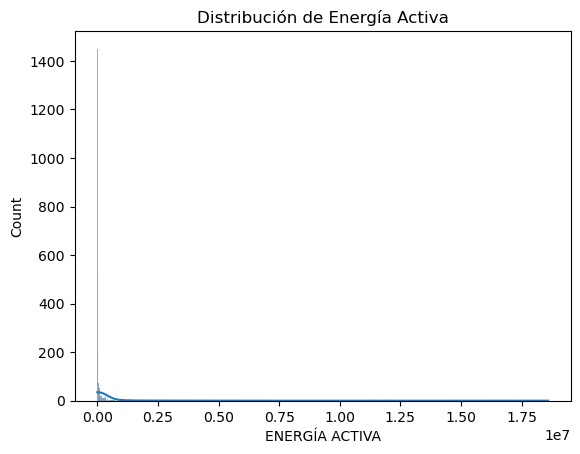

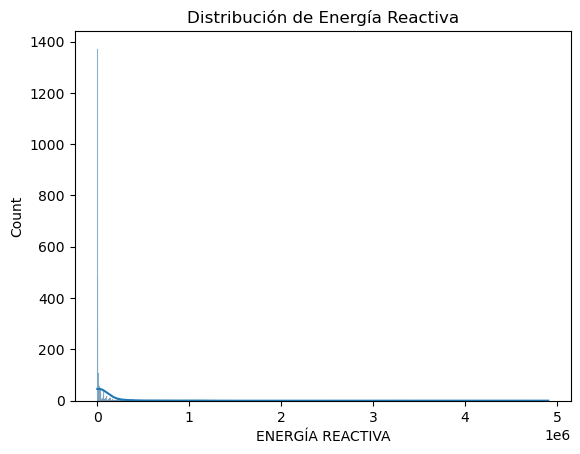

In [6]:
# Energía Activa
sns.histplot(df['ENERGÍA ACTIVA'], kde=True)
plt.title("Distribución de Energía Activa")
plt.show()

# Energía Reactiva
sns.histplot(df['ENERGÍA REACTIVA'], kde=True)
plt.title("Distribución de Energía Reactiva")
plt.show()

**Consumo por Departamento:** Analisis del consumo por departamento.

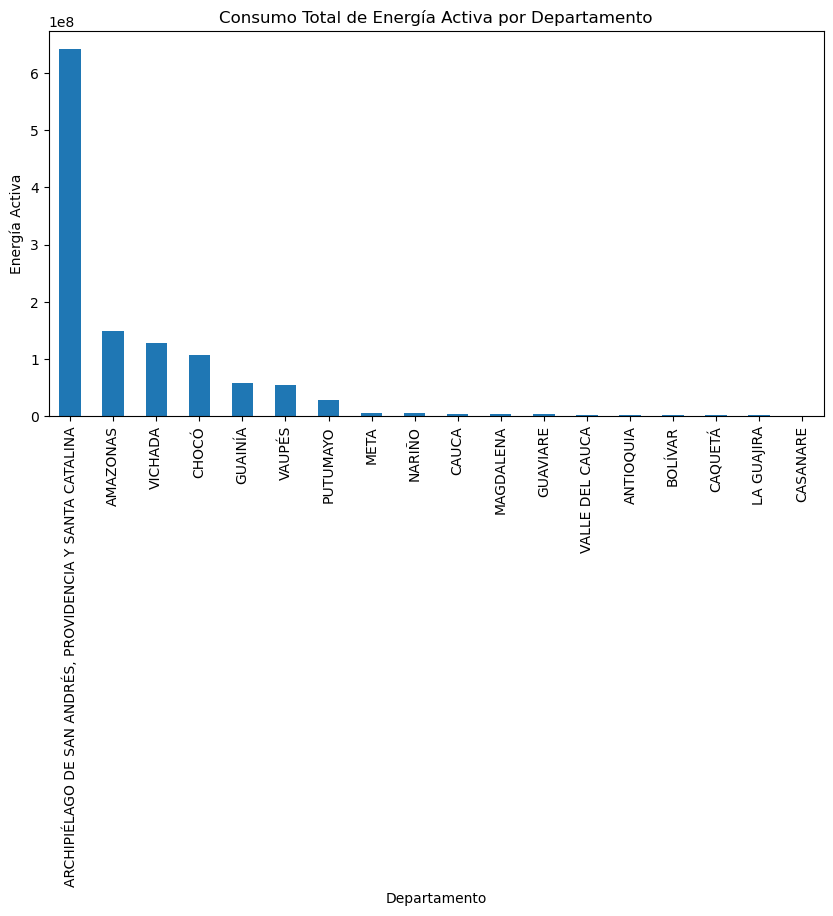

In [7]:
# Energía activa por departamento
consumo_por_departamento = df.groupby('DEPARTAMENTO')['ENERGÍA ACTIVA'].sum().sort_values(ascending=False)

# Gráfica
consumo_por_departamento.plot(kind='bar', figsize=(10, 5))
plt.title("Consumo Total de Energía Activa por Departamento")
plt.ylabel("Energía Activa")
plt.xlabel("Departamento")
plt.xticks(rotation=90)
plt.show()

**Patrones Temporales:** Mensuales.

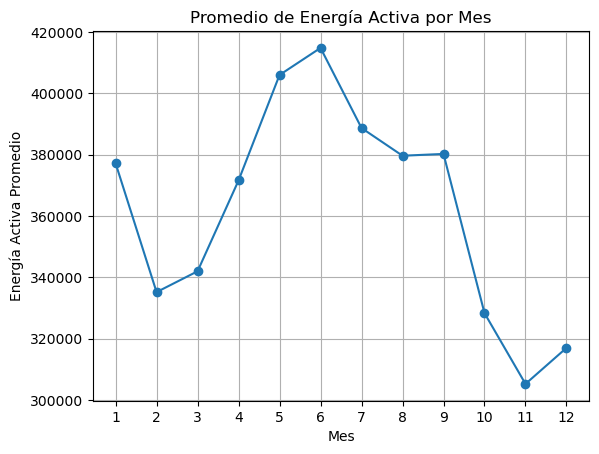

In [8]:
# Energía activa promedio por mes
consumo_mensual = df.groupby('MES SERVICIO')['ENERGÍA ACTIVA'].mean()

# Gráfica
consumo_mensual.plot(kind='line', marker='o')
plt.title("Promedio de Energía Activa por Mes")
plt.ylabel("Energía Activa Promedio")
plt.xlabel("Mes")
plt.xticks(range(1, 13))
plt.grid()
plt.show()

**Potencia Maxima:** Identificación de los días con la máxima demanda de potencia.

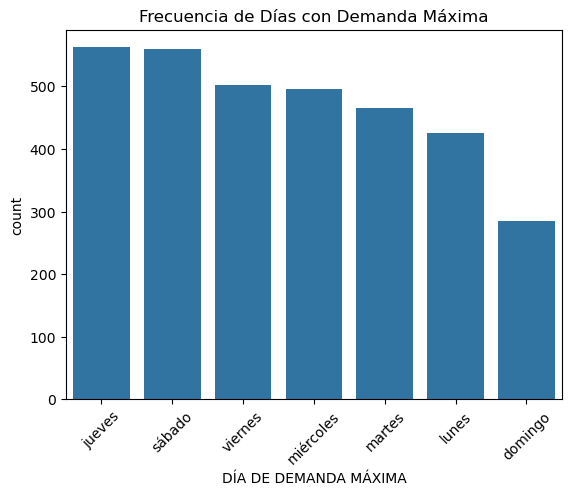

In [9]:
# Distribución de días con demanda máxima
sns.countplot(data=df, x='DÍA DE DEMANDA MÁXIMA', order=df['DÍA DE DEMANDA MÁXIMA'].value_counts().index)
plt.title("Frecuencia de Días con Demanda Máxima")
plt.xticks(rotation=45)
plt.show()

### *Analisis Exploratorio:*

**Correlación de entre Variables:** Investiga las relación entre Energía Activa y Reactiva.

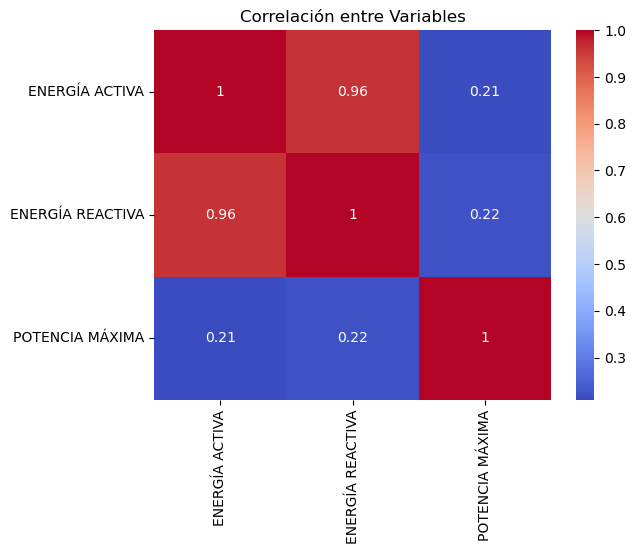

In [10]:
# Matriz de correlación
corr = df[['ENERGÍA ACTIVA', 'ENERGÍA REACTIVA', 'POTENCIA MÁXIMA']].corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlación entre Variables")
plt.show()

## *Transformación de datos*
-----

**Normalización:** De la Energía activa y Energía reactiva.

In [11]:
# Crear una copia de las columnas a transformar
scaler = MinMaxScaler()
df[['ENERGÍA ACTIVA', 'ENERGÍA REACTIVA']] = scaler.fit_transform(df[['ENERGÍA ACTIVA', 'ENERGÍA REACTIVA']])

# Verificar los valores transformados
print(df[['ENERGÍA ACTIVA', 'ENERGÍA REACTIVA']].head())

   ENERGÍA ACTIVA  ENERGÍA REACTIVA
0        0.211350          0.255092
1        0.005587          0.007402
2        0.001229          0.001891
3        0.000302          0.000282
4        0.000119          0.000110


**Análisis Estacional:** Identificación de patrones.

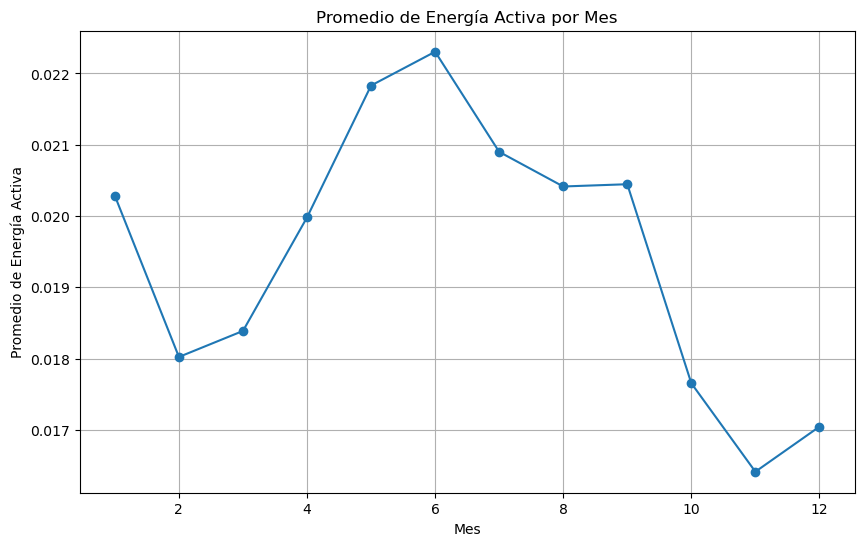

In [12]:
# Agrupar por mes y calcular el promedio de energía activa
consumo_mensual = df.groupby('MES SERVICIO')['ENERGÍA ACTIVA'].mean()

# Gráfica de los promedios mensuales
plt.figure(figsize=(10, 6))
plt.plot(consumo_mensual.index, consumo_mensual.values, marker='o')
plt.title('Promedio de Energía Activa por Mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de Energía Activa')
plt.grid()
plt.show()


**Clusterización de Localidades:** Usando el algoritmo K-Means se pueden agrupar las localidades en base a las variables energéticas.

In [13]:
# Seleccionar variables para clustering
data_cluster = df[['ENERGÍA ACTIVA', 'ENERGÍA REACTIVA', 'POTENCIA MÁXIMA']]

# Aplicar el algoritmo K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_cluster)

# Visualizar la cantidad de localidades por cluster
print(df['Cluster'].value_counts())

Cluster
0    3292
2       1
1       1
Name: count, dtype: int64


## *Preparación de los datos*
-----

In [14]:
# Seleccionar características (X) y etiqueta (y)
features = ['ENERGÍA REACTIVA', 'POTENCIA MÁXIMA', 'MES SERVICIO']
target = 'ENERGÍA ACTIVA'

X = df[features]
y = df[target]

# Dividir en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Datos divididos: ")
print(f"Conjunto de entrenamiento: {X_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}")

Datos divididos: 
Conjunto de entrenamiento: (2635, 3)
Conjunto de prueba: (659, 3)


## *Modelo Predictivo*
----

### *Construcción de los modelos Supervisados*

#### **Random Forest**

In [15]:
# Entrenar el modelo
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
rf_predictions = rf_model.predict(X_test)

# Evaluar el modelo
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest - MSE: {rf_mse}, R2: {rf_r2}")


Random Forest - MSE: 0.000863636700849653, R2: 0.901449827973732


#### **Regresión Lineal**

In [16]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)

lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print(f"Regresión Lineal - MSE: {lr_mse}, R2: {lr_r2}")

Regresión Lineal - MSE: 0.0012171963465661757, R2: 0.861104896045028


#### **SVM**

Preparación, SVM es muy demandante computacionalmente hablando.

In [24]:
# Selección de columnas
columns_to_keep = [
    'AÑO SERVICIO', 'MES SERVICIO', 'ENERGÍA REACTIVA', 
    'POTENCIA MÁXIMA', 'PROMEDIO DIARIO EN HORAS', 'ENERGÍA ACTIVA'
]
df2 = df[columns_to_keep]

# Definir X (características) e y (variable objetivo)
X = df2.drop(columns=['ENERGÍA ACTIVA'])  # Características
y = df2['ENERGÍA ACTIVA']  # Variable objetivo

# Escalado de características
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separación de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Modelo SVR (regresión)
from sklearn.svm import SVR
svr_model = SVR(kernel='linear', C=1, max_iter=10000)
svr_model.fit(X_train, y_train)

# Predicción y evaluación
from sklearn.metrics import mean_squared_error, r2_score
y_pred_svr = svr_model.predict(X_test)

# Definir métricas para comparación
svr_mse = mean_squared_error(y_test, y_pred_svr)
svr_r2 = r2_score(y_test, y_pred_svr)

# Imprimir resultados
print("SVR - MSE:", svr_mse)
print("SVR - R2 Score:", svr_r2)


SVR - MSE: 0.002506499987182803
SVR - R2 Score: 0.725916219965378


### **Evaluación de los modelos**

Resultados de la Evaluación de Modelos:
             Modelo       MSE        R2
0     Random Forest  0.000864  0.901450
1  Regresión Lineal  0.001217  0.861105
2               SVM  0.002506  0.725916


<Figure size 1000x600 with 0 Axes>

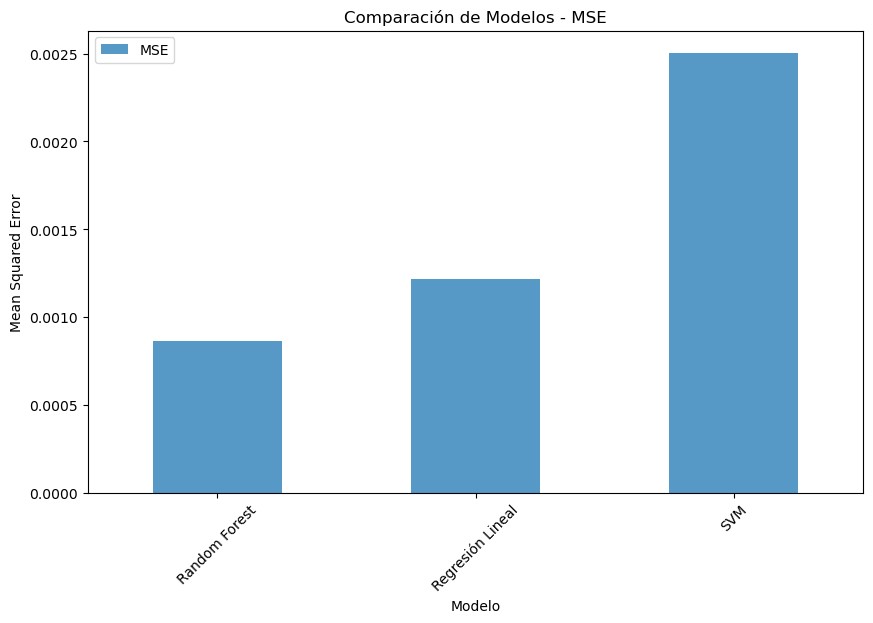

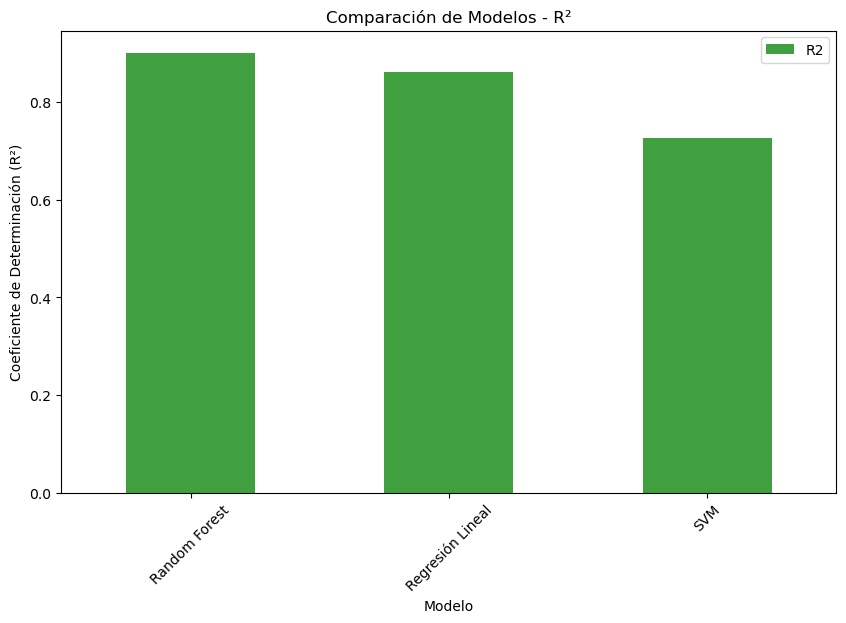

In [25]:
# Resultados de los modelos
model_results = {
    "Modelo": ["Random Forest", "Regresión Lineal", "SVM"],
    "MSE": [rf_mse, lr_mse, svr_mse],  # Reemplaza con las variables que contienen los MSE
    "R2": [rf_r2, lr_r2, svr_r2]       # Reemplaza con las variables que contienen los R²
}

# Crear un DataFrame con los resultados
results_df = pd.DataFrame(model_results)

# Mostrar los resultados en tabla
print("Resultados de la Evaluación de Modelos:")
print(results_df)

# Visualizar los resultados
plt.figure(figsize=(10, 6))

# Crear un gráfico de barras para MSE
results_df.set_index("Modelo")[["MSE"]].plot(kind="bar", legend=True, figsize=(10, 6), alpha=0.75)
plt.title("Comparación de Modelos - MSE")
plt.ylabel("Mean Squared Error")
plt.xticks(rotation=45)
plt.show()

# Crear un gráfico de barras para R²
results_df.set_index("Modelo")[["R2"]].plot(kind="bar", color='green', legend=True, figsize=(10, 6), alpha=0.75)
plt.title("Comparación de Modelos - R²")
plt.ylabel("Coeficiente de Determinación (R²)")
plt.xticks(rotation=45)
plt.show()